In [8]:
'''
resources: https://www.statisticshowto.com/sensitivity-vs-specificity-statistics/

https://en.wikipedia.org/wiki/Precision_and_recall#Precision

https://builtin.com/data-science/step-step-explanation-principal-component-analysis

https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

https://gerardnico.com/data_mining/pca

https://github.com/WillKoehrsen/feature-selector/blob/master/Feature%20Selector%20Development.ipynb

https://towardsdatascience.com/a-feature-selection-tool-for-machine-learning-in-python-b64dd23710f0

https://towardsdatascience.com/churn-prediction-3a4a36c2129a

https://realpython.com/logistic-regression-python/

https://medium.com/@thevie/fighting-telco-customer-churn-problem-a-data-driven-analysis-e7c61cfae0dd

https://towardsdatascience.com/churn-prediction-770d6cb582a5

RFE: https://towardsdatascience.com/predict-employee-turnover-with-python-da4975588aa3

https://medium.com/@thevie/fighting-telco-customer-churn-problem-a-data-driven-analysis-e7c61cfae0dd
'''


'\nresources: https://www.statisticshowto.com/sensitivity-vs-specificity-statistics/\n\nhttps://en.wikipedia.org/wiki/Precision_and_recall#Precision\n\nhttps://builtin.com/data-science/step-step-explanation-principal-component-analysis\n\nhttps://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html\n\nhttps://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60\n\nhttps://gerardnico.com/data_mining/pca\n\nhttps://github.com/WillKoehrsen/feature-selector/blob/master/Feature%20Selector%20Development.ipynb\n\nhttps://towardsdatascience.com/a-feature-selection-tool-for-machine-learning-in-python-b64dd23710f0\n\nhttps://towardsdatascience.com/churn-prediction-3a4a36c2129a\n\nhttps://realpython.com/logistic-regression-python/\n\nhttps://medium.com/@thevie/fighting-telco-customer-churn-problem-a-data-driven-analysis-e7c61cfae0dd\n\nhttps://towardsdatascience.com/churn-prediction-770d6cb582a5\n'

In [0]:
#Import the library
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
#Load the data set
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (1).csv


In [0]:
#Load the data into the data frame
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [12]:
df[df.TotalCharges == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
#Note Churn = 0 = No, Churn = Yes = 1
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
df[df.Churn == 'Yes'].shape

(1869, 21)

In [15]:
df[df.Churn == 'No'].shape

(5174, 21)

In [0]:
#Transform non-numeric columns into numerical columns
from sklearn.preprocessing import LabelEncoder
conv_df = df

for column in conv_df.columns:
        if conv_df[column].dtype == np.number:
            continue
        conv_df[column] = LabelEncoder().fit_transform(conv_df[column])

In [0]:
cleaned_data = conv_df

In [18]:
#Show the first 5 rows of the new data set
cleaned_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [0]:
#Scale the cleaned data
from sklearn.preprocessing import StandardScaler

X = cleaned_data.drop('Churn', axis = 1)
y = cleaned_data['Churn']

# Standardizing/scaling the features
X = StandardScaler().fit_transform(X)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1052bfd9e8>,
      dtype=object)

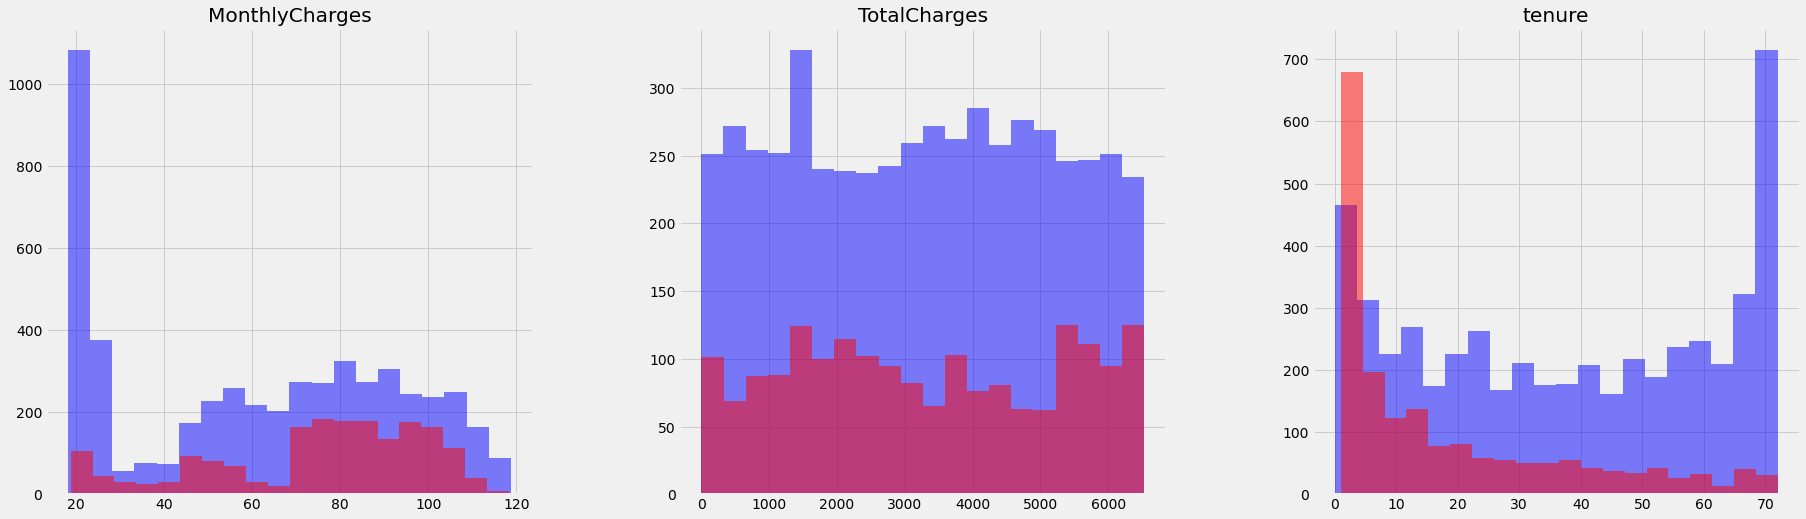

In [20]:
'''
To determine which features or services discriminate retained cutomers from churned customers, 
I will create histograms of three features (MonthlyCharges, TotalCharges, and tenure ). From the image I 
can see that a high proportion of retained customers have a monthly charge between $20 and $30. , 
while the majority of churned customers had a monthly charge between $50 and $100 . 

I would expect the total charges to be heavily skewed to the left since most customers have a lower monthly charge, but I
can't truly see any discrimination from the total charges plot. 

The tenure histogram is heavily skewed towards the left for customers that churned and heavily skewed towards the right for customers 
that were retained. We can observe that the greater the tenure, the less chance of a customer churning.


'''
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
fig, ax = plt.subplots(1, 3, figsize=(28, 8))
cleaned_data[cleaned_data.Churn == 0][numerical_features].hist(bins=20, color="blue", alpha=0.5, ax=ax)
cleaned_data[cleaned_data.Churn == 1][numerical_features].hist(bins=20, color="red", alpha=0.5, ax=ax)


In [21]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3) #Reduce the dimensionality to 3
principalComponents = pca.fit_transform(X)

principalComponents

array([[-2.21159282, -0.12837244,  2.95489749],
       [-1.29689755, -1.43656683,  0.75853657],
       [-2.53643962, -0.52833432,  0.89428553],
       ...,
       [-1.70748203, -1.17879458,  3.42061673],
       [-2.33300925,  1.78155493,  0.21541084],
       [ 2.82951048,  0.47163846, -0.61667477]])

In [22]:
#Here, we can see that about 79.6% of the total variance comes from the first 2 components
ex_variance=np.var(principalComponents,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio )

[0.48551461 0.31084243 0.20364296]


In [0]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #Reduce the dimensionality to 2
principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [24]:
finalDf = pd.concat([principalDf, df[['Churn']]], axis = 1)
finalDf

,principal component 1,principal component 2,Churn
0,-2.217375,-0.135871,0
1,-1.293392,-1.432042,0
2,-2.541600,-0.531691,1
3,0.110644,-1.872992,0
4,-3.233248,0.352175,1
...,...,...,...
7038,1.870722,-0.027369,0
7039,3.049294,1.534338,0
7040,-1.710632,-1.183509,0
7041,-2.336063,1.784013,1


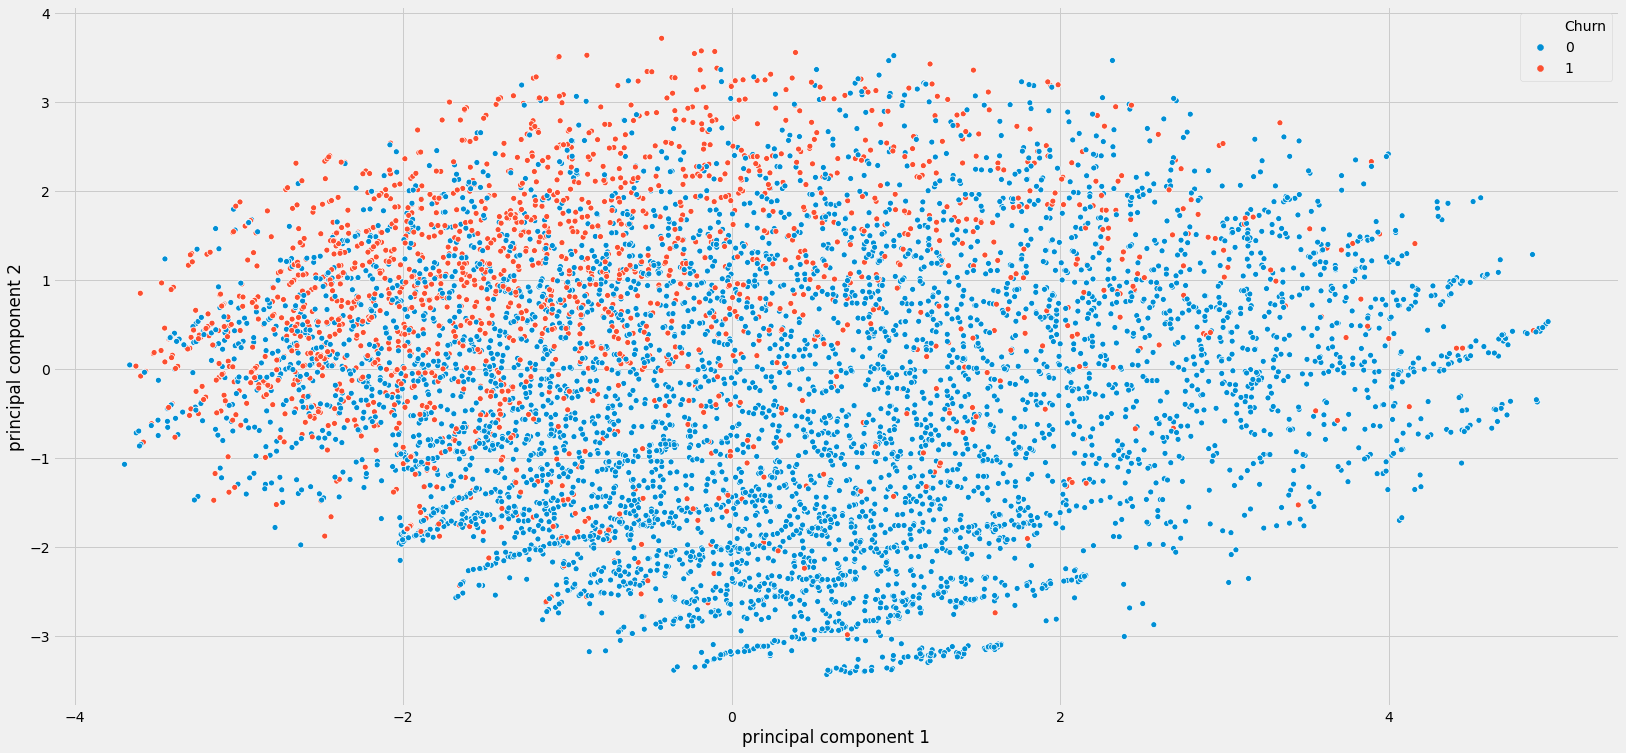

In [25]:
"""
Now, since the PCA components are orthogonal to each other and they are not 
correlated, we can expect to see Churn and Retained (Not Churned) classes distinctly.
Below is a plot of customer churn based on the first 2 principal components of the feature data
"""
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (25, 12))
sns.scatterplot("principal component 1", "principal component 2", data = finalDf, hue ='Churn' )

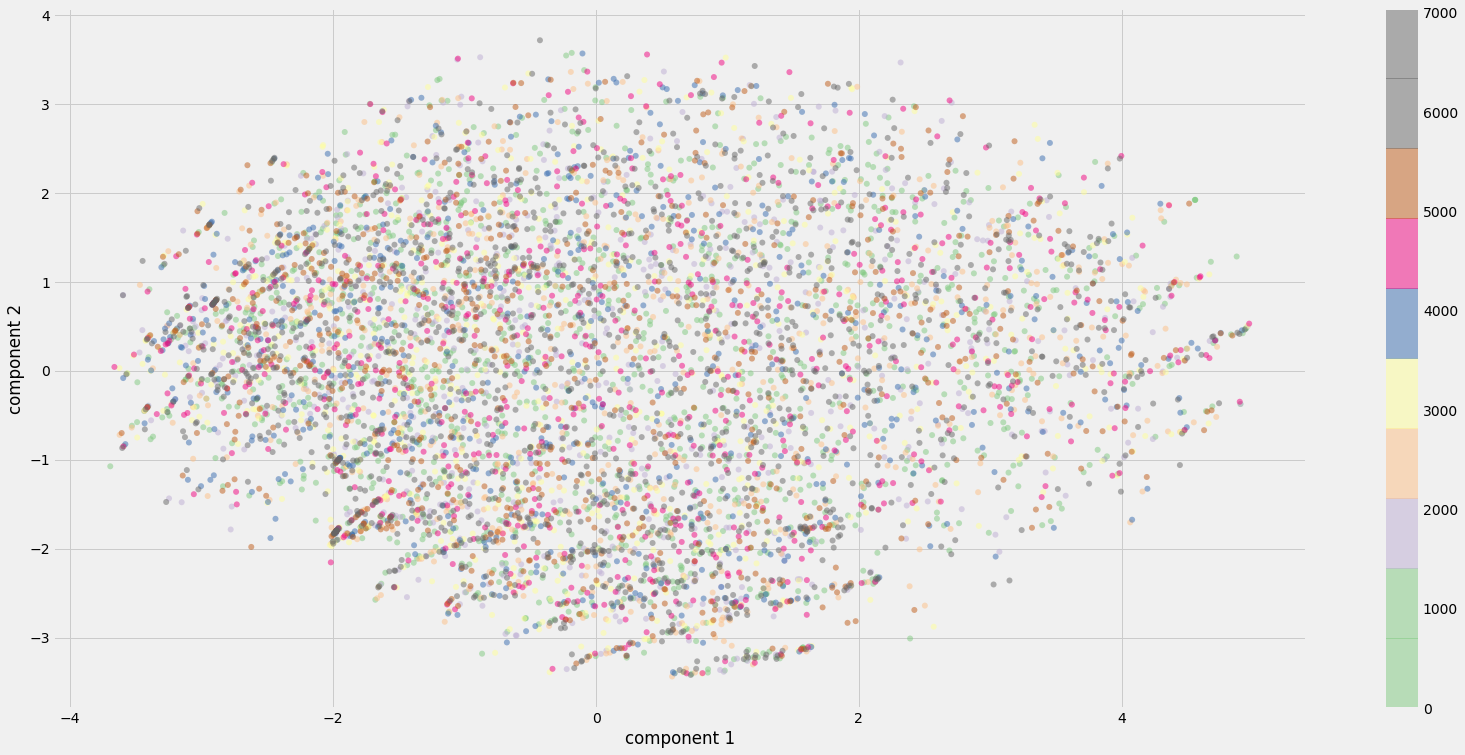

In [26]:
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

plt.figure(figsize = (25, 12))

projected = principalComponents
num_seq = range(0, X.shape[0])
plt.scatter(projected[:, 0], projected[:, 1],
             edgecolor='none', alpha=0.5, c=num_seq,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [27]:
#Here, we can see that 100% of the total variance comes from these 2 components
ex_variance=np.var(principalComponents,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio )

[0.60967036 0.39032964]


In [28]:
principalComponents

array([[-2.21737492, -0.13587079],
       [-1.29339191, -1.43204234],
       [-2.54160036, -0.53169088],
       ...,
       [-1.71063228, -1.1835091 ],
       [-2.33606261,  1.78401321],
       [ 2.83257148,  0.47115612]])

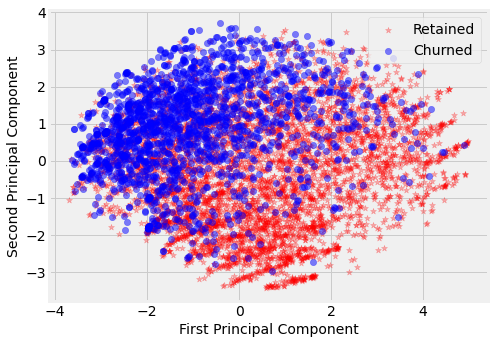

In [29]:
"""
Now, since the PCA components are orthogonal to each other and they are not 
correlated, we can expect to see Churn and Retained (Not Churn) classes distinctly.
Below is a plot of customer churn based on the first 2 principal components of the feature data
"""

Xax=principalComponents[:,0]
Yax=principalComponents[:,1]
labels=df['Churn']
cdict={0:'red',1:'blue'}
labl={0:'Retained',1:'Churned'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
 ix=np.where(labels==l)
 ax.scatter(Xax[ix],Yax[ix],c=cdict[l],s=40,
           label=labl[l],marker=marker[l],alpha=alpha[l])
# for loop ends
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()
# please check the scatter plot of the remaining component and you will understand the difference

In [0]:
from sklearn.model_selection import train_test_split


#Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
x_train.shape

(5634, 20)

In [0]:
# Make an instance of the Model / Choose the minimum number of principal components such that 95% of the variance is retained
from sklearn.decomposition import PCA
pca = PCA(.95)

In [33]:
#Fit PCA on training set
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [34]:
pca.n_components_

17

In [0]:
#Apply the mapping (transform) to both the training set and the test set.
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

In [36]:
x_train.shape

(5634, 17)

In [37]:
x_train

array([[-0.55427177, -1.56771286,  0.15111268, ..., -0.13977465,
         1.39855238,  0.75790843],
       [ 1.69885379,  1.89353253, -0.47436852, ..., -1.19331361,
        -0.03416173,  0.84893702],
       [-2.88774891, -0.16747976,  2.94142757, ...,  0.03748475,
         0.01037024,  0.29085483],
       ...,
       [-0.6279774 , -1.63297391, -1.15729479, ...,  0.01762408,
         0.33386784, -1.05652842],
       [-0.59201358,  2.91949035, -1.11460727, ...,  0.50724464,
         0.02168883, -0.46877031],
       [-0.52481801, -1.77818201, -1.35602408, ..., -0.42499883,
        -0.02104076, -0.3892267 ]])

In [0]:
from sklearn.linear_model import LogisticRegression
#Train the model
model = LogisticRegression()
model.fit(x_train, y_train) #Training the model

In [39]:
x_train.shape[1]

17

In [40]:
#recursive feature elimination
from sklearn.feature_selection import RFE

logreg = LogisticRegression()
rfe = RFE(logreg, x_train.shape[1])
rfe = rfe.fit(x_train,y_train)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [44]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

predictions = model.predict(x_test)
print(predictions)# printing predictions

print()# Printing new line

#Check precision, recall, f1-score
print( classification_report(y_test, predictions) )

print( accuracy_score(y_test, predictions))

[0 0 0 ... 0 0 1]

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409

0.8105039034776437


In [45]:
import numpy as np
y_test_array = np.asarray(y_test)

num_retained = 0
num_churned =0
#Note: Churn = No = 0, Churn = Yes = 1
for i in range(0,len(y_test_array)):
  if y_test_array[i] == 0:
    num_retained = num_retained + 1
  else:
    num_churned = num_churned + 1

print("The number of retained customers in the test data set: ",num_retained)
print("The number of churned customers in the test data set: ", num_churned)

The number of retained customers in the test data set:  1036
The number of churned customers in the test data set:  373


In [46]:
print("Guessing that all customers will be retained accuracy score : ", num_retained/(num_retained+num_churned) )

Guessing that all customers will be retained accuracy score :  0.7352732434350603


In [47]:
#From the confusion matrix we can see that the logistic regression model predicted:
#1. True Positive = 941  (a predicted positive result that was actually positive)
#2. True Negative = 201 (a predicted negative result that was actually negative)
#3. False Positive = 172  (a predicted positive result that was actually negative)
#4. False Negative = 95 (a predicted negative result that was actually positive)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[941,  95],
       [172, 201]])

In [48]:
# Get the confusion matrix (TP, FP, FN, & TN)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
TP = cm[0][0]
FN = cm[0][1]
FP = cm[1][0]
TN = cm[1][1]
#Compute the miss rate 
miss_rate = FN / (FN + TP)

print('The miss rate:', miss_rate)


The miss rate: 0.0916988416988417


In [49]:
# Get the confusion matrix (TP, FP, FN, & TN)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
TP = cm[0][0]
FN = cm[0][1]
FP = cm[1][0]
TN = cm[1][1]
#Compute the specificity 
specificity = TN / (TN + FP)

print('The specificity:', specificity)


The specificity: 0.5388739946380697
